In [44]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px


In [25]:
strain_table = pd.read_excel(os.path.normpath("C:/Users/heineib/Google Drive/Crick_LMS/Marguerat_lab/Wild_strains/41588_2015_BFng3215_MOESM49_ESM.xlsx"), sheet_name="4", skiprows=16, index_col=0)
strain_table['strain']=strain_table.index

strain_metadata = pd.read_excel(os.path.normpath("C:/Users/heineib/Google Drive/Crick_LMS/Marguerat_lab/Wild_strains/41588_2015_BFng3215_MOESM49_ESM.xlsx"), sheet_name="1", skiprows=4, skipfooter = 4, index_col=0)
 
strain_table_subset = strain_table.loc[strain_metadata['in set of 57 strains']=='Y', :]

In [20]:
list(strain_table.columns)

['aaconc.alanine',
 'aaconc.arginine',
 'aaconc.asparagine',
 'aaconc.aspartate',
 'aaconc.glutamate',
 'aaconc.glutamine',
 'aaconc.glycine',
 'aaconc.histidine',
 'aaconc.isoleucine',
 'aaconc.leucine',
 'aaconc.lysine',
 'aaconc.methionine',
 'aaconc.phenylalanine',
 'aaconc.proline',
 'aaconc.serine',
 'aaconc.threonine',
 'aaconc.tryptophan',
 'aaconc.tyrosine',
 'aaconc.valine',
 'misc.mating.free.spores',
 'shape1.lengthtype.liquid',
 'lmgrowth.emm2.dM.dT.best',
 'lmgrowth.emm2.integral',
 'lmgrowth.emm2.lag',
 'lmgrowth.emm2.max.mass',
 'lmgrowth.emm2.max.slope',
 'lmgrowth.emm2.max.slope.time',
 'lmgrowth.emm2.plateau.best',
 'lmgrowth.yes.dM.dT.best.average',
 'lmgrowth.yes.integral.average',
 'lmgrowth.yes.lag.average',
 'lmgrowth.yes.max.mass.average',
 'lmgrowth.yes.max.slope.average',
 'lmgrowth.yes.max.slope.time.average',
 'lmgrowth.yes.plateau.best.average',
 'misc.mating.figures',
 'misc.mating.type',
 'shape1.facs.percent2C',
 'shape1.facs.percent2to4C',
 'shape1.fac

In [23]:
cols_to_show = [ 'strain',
                 'shape1.lengthtype.liquid',
                 'lmgrowth.emm2.dM.dT.best',
                 'lmgrowth.emm2.integral',
                 'lmgrowth.emm2.lag',
                 'lmgrowth.emm2.max.mass',
                 'lmgrowth.emm2.max.slope',
                 'lmgrowth.emm2.max.slope.time',
                 'lmgrowth.emm2.plateau.best',
                 'lmgrowth.yes.dM.dT.best.average',
                 'lmgrowth.yes.integral.average',
                 'lmgrowth.yes.lag.average',
                 'lmgrowth.yes.max.mass.average',
                 'lmgrowth.yes.max.slope.average',
                 'lmgrowth.yes.max.slope.time.average',
                 'lmgrowth.yes.plateau.best.average',
                 'shape1.length.CoV',
                 'shape1.length.median',
                 'shape1.length.stdev',
                 'smgrowth.glycerol.2percent',
                 'smgrowth.H2O2.0.5.mM',
                 'smgrowth.H2O2.1.mM',
                 'smgrowth.H2O2.3.mM',
                 'smgrowth.H2O2.5.mM',
                 'misc.flocculation'
               ]

cols_pairplot = [#'shape1.lengthtype.liquid',
                 'lmgrowth.emm2.dM.dT.best',
                 #'lmgrowth.emm2.integral',
                 'lmgrowth.emm2.lag',
                 #'lmgrowth.emm2.max.mass',
                 #'lmgrowth.emm2.max.slope',
                 #'lmgrowth.emm2.max.slope.time',
                 'lmgrowth.emm2.plateau.best',
                 'lmgrowth.yes.dM.dT.best.average',
                 #'lmgrowth.yes.integral.average',
                 'lmgrowth.yes.lag.average',
                 #'lmgrowth.yes.max.mass.average',
                 #'lmgrowth.yes.max.slope.average',
                 #'lmgrowth.yes.max.slope.time.average',
                 'lmgrowth.yes.plateau.best.average',
                 #'shape1.length.CoV',
                 #'shape1.length.median',
                 'smgrowth.glycerol.2percent',
                 'smgrowth.H2O2.0.5.mM',
                 'smgrowth.H2O2.1.mM',
                 #'smgrowth.H2O2.3.mM',
                 #'smgrowth.H2O2.5.mM',
                 #'misc.flocculation'
               ]

In [26]:
strain_table_subset = strain_table_subset.loc[:,cols_to_show].fillna(0)

In [9]:
#strain_table_subset[strain_table_subset['smgrowth.H2O2.0.5.mM']]

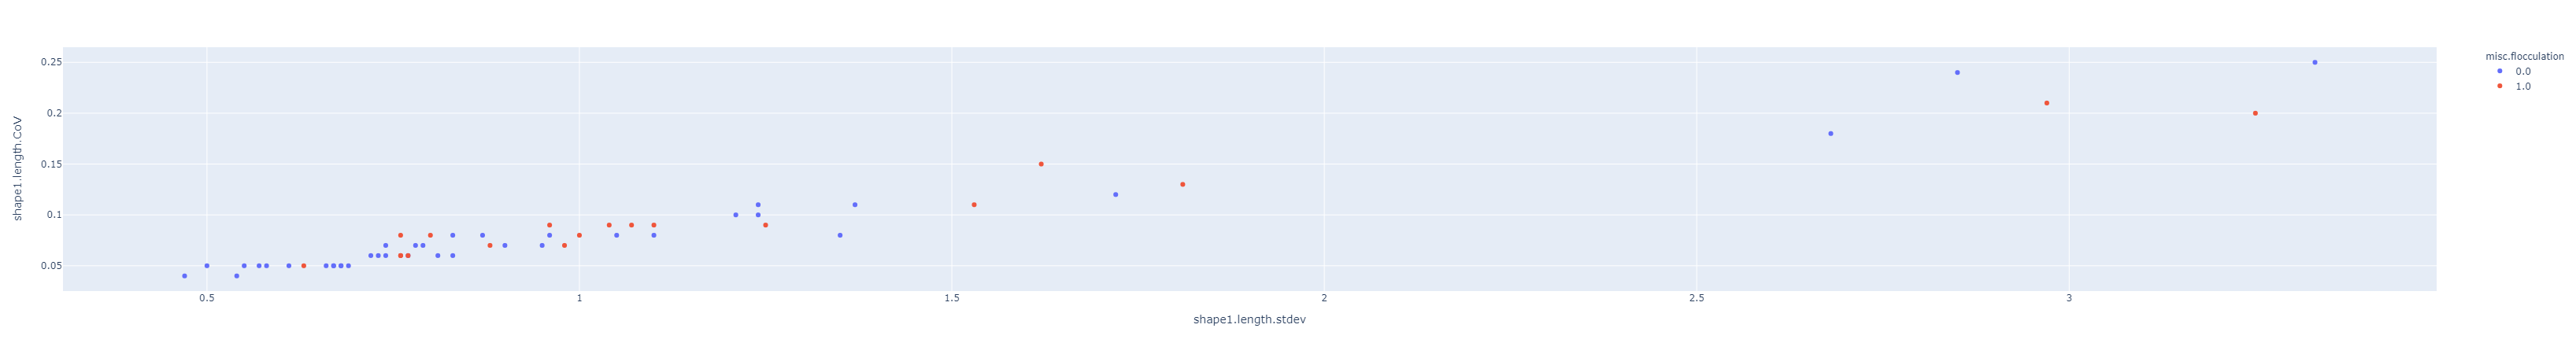

In [27]:
#"shape1.lengthtype.liquid"
#'smgrowth.H2O2.3.mM'
# 'lmgrowth.emm2.dM.dT.best'
strain_table_subset['misc.flocculation'] = strain_table_subset['misc.flocculation'].astype('string')
fig = px.scatter(strain_table_subset, x='shape1.length.stdev', y='shape1.length.CoV', color='misc.flocculation',
                 hover_data=['strain'])
fig.show()

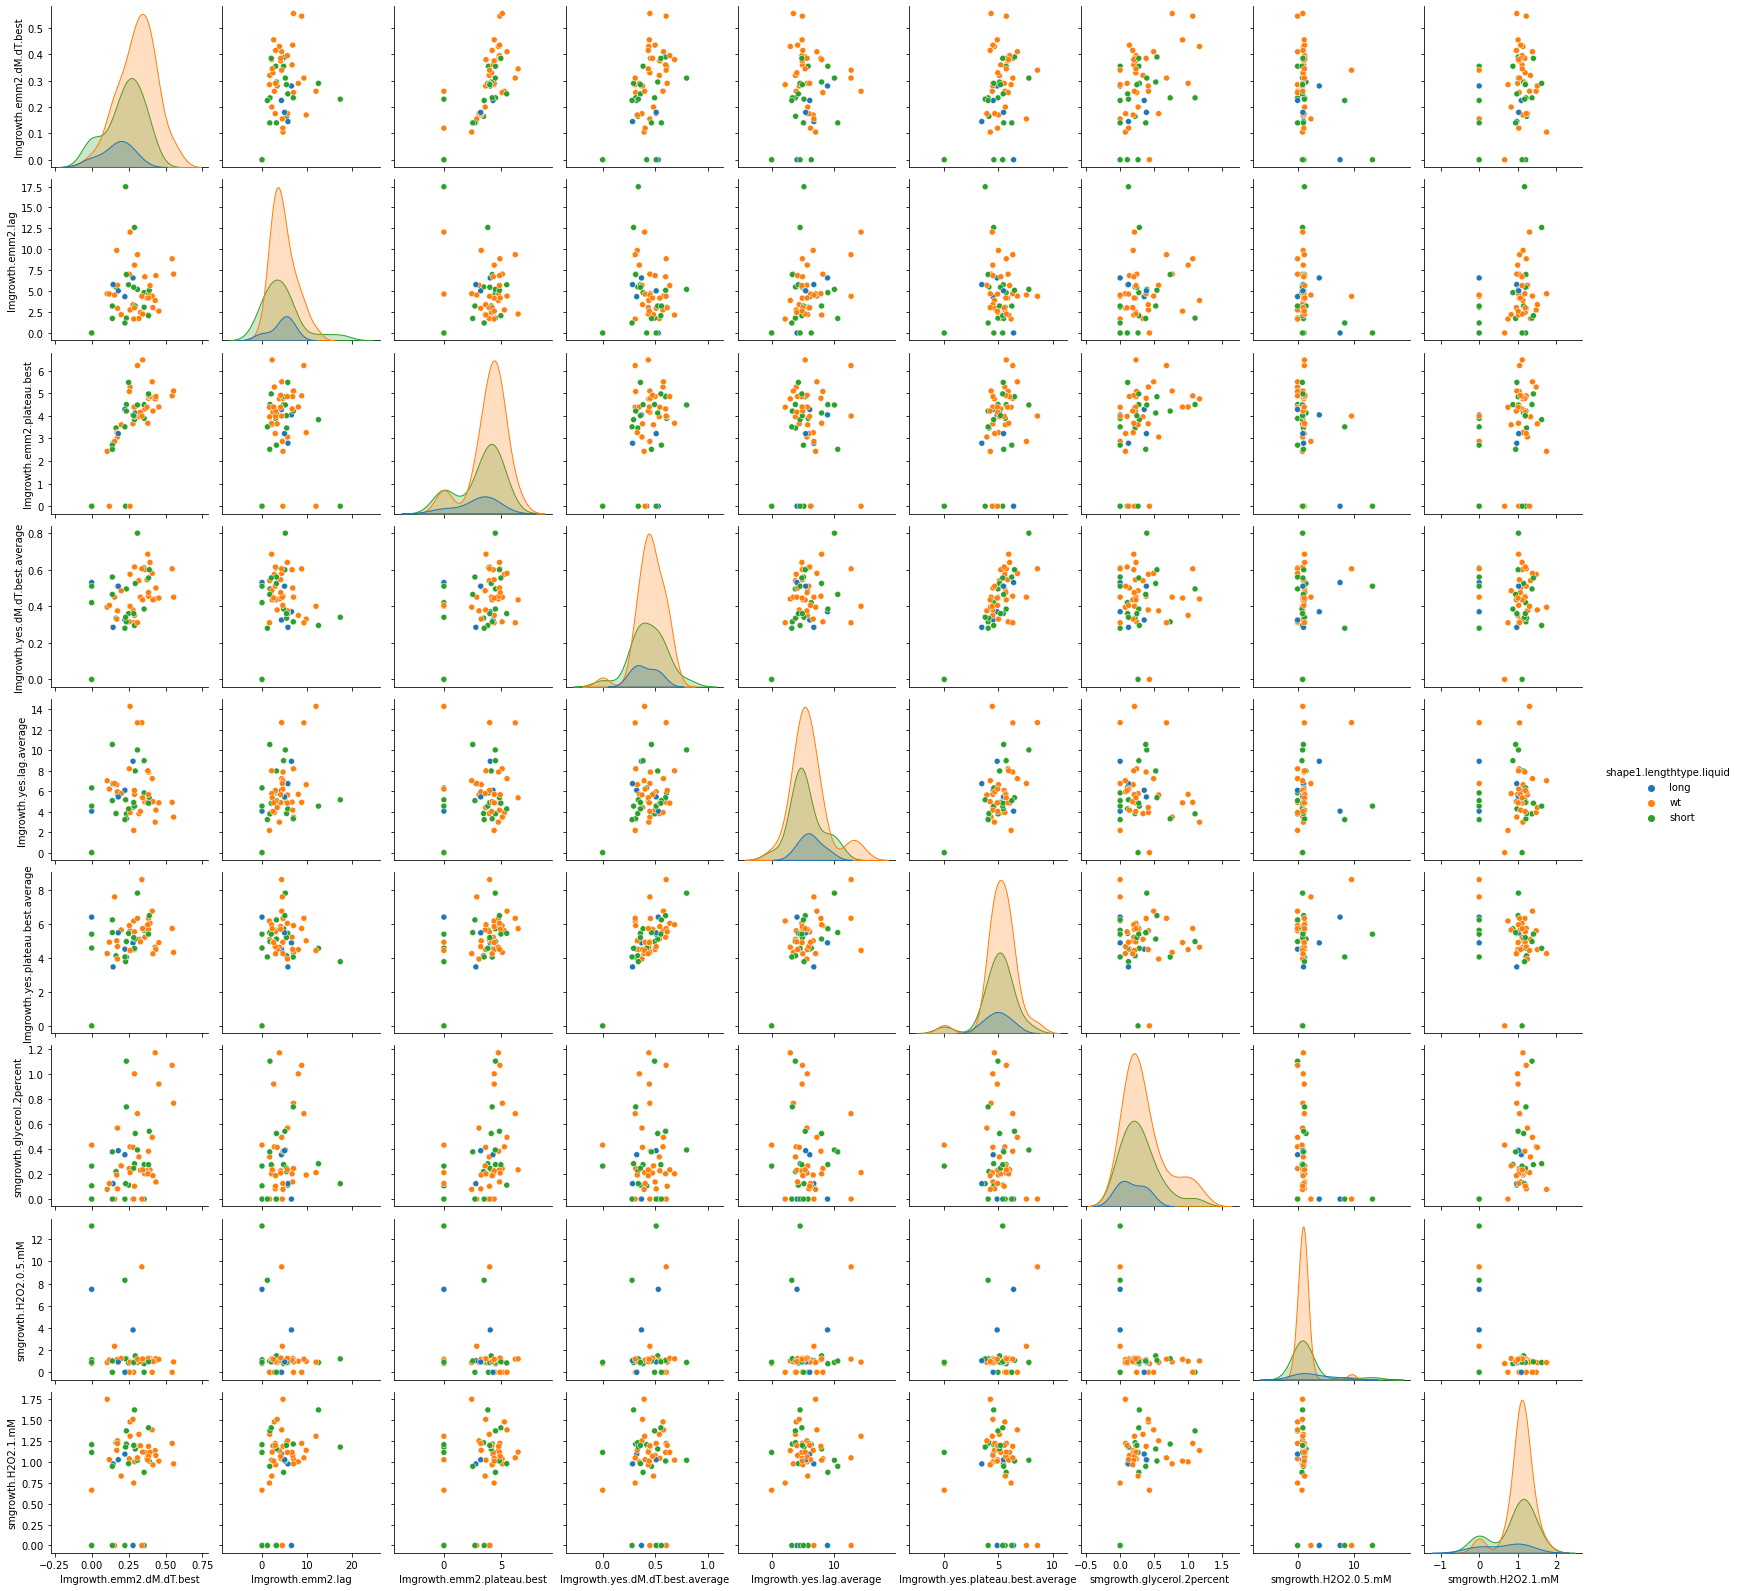

In [29]:
sns.pairplot(strain_table_subset, vars = cols_pairplot, hue='shape1.lengthtype.liquid')

In [22]:
candidate_strains = ['JB22', 'JB869', 'JB759', 'JB837', 'JB858', 'JB758',  'JB1206', 'JB762', 'JB838',  'JB939']
key_cols = [     'lmgrowth.emm2.dM.dT.best',
                 #'lmgrowth.emm2.integral',
                 'lmgrowth.emm2.lag',
                 #'lmgrowth.emm2.max.mass',
                 #'lmgrowth.emm2.max.slope',
                 #'lmgrowth.emm2.max.slope.time',
                 'lmgrowth.emm2.plateau.best',
                 'lmgrowth.yes.dM.dT.best.average',
                 #'lmgrowth.yes.integral.average',
                 'lmgrowth.yes.lag.average',
                 #'lmgrowth.yes.max.mass.average',
                 #'lmgrowth.yes.max.slope.average',
                 #'lmgrowth.yes.max.slope.time.average',
                 'lmgrowth.yes.plateau.best.average',
                 'smgrowth.glycerol.2percent',
                 'smgrowth.H2O2.0.5.mM',
                 'smgrowth.H2O2.1.mM',
                 'smgrowth.H2O2.3.mM',
                 #'smgrowth.H2O2.5.mM',
                 'shape1.lengthtype.liquid',
                 'shape1.length.CoV',
                 'shape1.length.median', 
                 'shape1.width.CoV',
                 'shape1.width.median',
                 'misc.flocculation'
               ]


strain_table.loc[candidate_strains, key_cols].to_csv(os.path.normpath("C:/Users/heineib/Google Drive/Crick_LMS/Marguerat_lab/Wild_strains/candidate_strains.csv"))

## H2O2 response of subset

In [46]:
#Table for Timepoint 1
h2o2_data_t1 = pd.read_excel(os.path.normpath("C:/Users/heineib/Google Drive/Crick_LMS/Wetlab/spectrophotometer/20201203_pombe_strains_H2O2.xlsx"), sheet_name="H2O2_summary_T1", index_col=0)
 

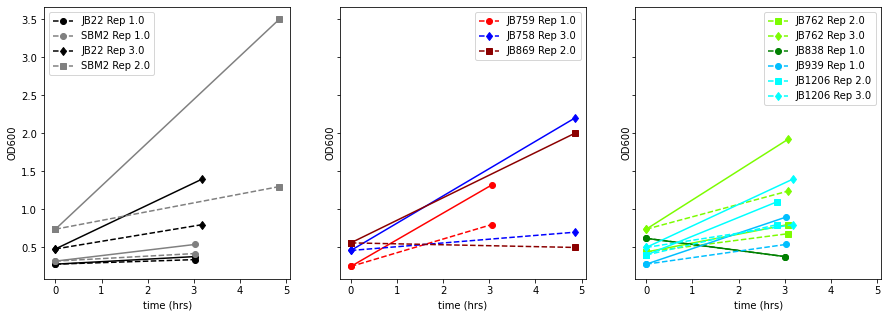

In [50]:
fig, axarr = plt.subplots(1,3, sharex = True, sharey = True, figsize = (15,5))

color_map = {'JB22': 'k',  #wt control 
            'SBM2': 'grey',  #wt control
            'JB759': 'r', #clement-ziza strain
            'JB869': 'darkred', #clement-ziza type strain
            'JB837': 'darkorange', #Strain that won competition 
            'JB758': 'b', #Control: best at EMM - not so good at ox stress
            'JB858': 'm', #Control: best at ox stress - not so good at EMM
            'JB762': 'lawngreen',
            'JB939': 'deepskyblue',
            'JB838': 'g',
            'JB1206': 'cyan'
            }

marker_map = {1: 'o', 
              2: 's', 
              3: 'd'}



for strain, (rep, od_t0, dt, od_cont, od_h2o2) in h2o2_data_t1.iterrows(): 
    od_cont_course = [od_t0, od_cont]
    od_h2o2_course = [od_t0, od_h2o2]
    t = np.array([0, dt])/60
    if strain in {'JB22', 'SBM2'}:
        ax = axarr[0]
        ax.plot(t, od_cont_course, color = color_map[strain], linestyle= '-', marker=marker_map[rep])
        ax.plot(t, od_h2o2_course, color = color_map[strain], linestyle = '--', marker=marker_map[rep], label = strain + ' Rep ' + str(rep))
    elif strain in {'JB759', 'JB869', 'JB758', 'JB858', 'JB837'}: 
        ax = axarr[1]
        ax.plot(t, od_cont_course, color = color_map[strain], linestyle= '-', marker=marker_map[rep])
        ax.plot(t, od_h2o2_course, color = color_map[strain], linestyle = '--', marker=marker_map[rep], label = strain + ' Rep ' + str(rep))
    else: 
        ax = axarr[2]
        ax.plot(t, od_cont_course, color = color_map[strain], linestyle= '-', marker=marker_map[rep])
        ax.plot(t, od_h2o2_course, color = color_map[strain], linestyle = '--', marker=marker_map[rep], label = strain + ' Rep ' + str(rep))
    ax.legend()
    ax.set_xlabel('time (hrs)')
    ax.set_ylabel('OD600')

In [30]:
#Table for Timepoint 2
h2o2_data_t2 = pd.read_excel(os.path.normpath("C:/Users/heineib/Google Drive/Crick_LMS/Wetlab/spectrophotometer/20201203_pombe_strains_H2O2.xlsx"), sheet_name="H2O2_summary_T2", index_col=0)
 

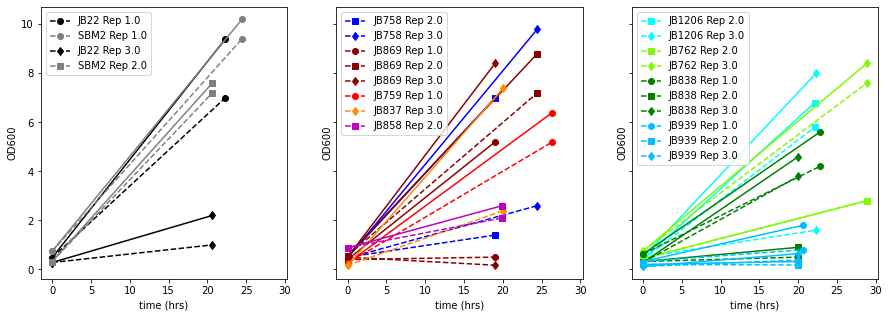

In [45]:
fig, axarr = plt.subplots(1,3, sharex = True, sharey = True, figsize = (15,5))

color_map = {'JB22': 'k',  #wt control 
            'SBM2': 'grey',  #wt control
            'JB759': 'r', #clement-ziza strain
            'JB869': 'darkred', #clement-ziza type strain
            'JB837': 'darkorange', #Strain that won competition 
            'JB758': 'b', #Control: best at EMM - not so good at ox stress
            'JB858': 'm', #Control: best at ox stress - not so good at EMM
            'JB762': 'lawngreen',
            'JB939': 'deepskyblue',
            'JB838': 'g',
            'JB1206': 'cyan'
            }

marker_map = {1: 'o', 
              2: 's', 
              3: 'd'}




for strain, (rep, od_t0, dt, od_cont, od_h2o2) in h2o2_data_t2.iterrows(): 
    od_cont_course = [od_t0, od_cont]
    od_h2o2_course = [od_t0, od_h2o2]
    t = np.array( [0, dt])/60
    if strain in {'JB22', 'SBM2'}:
        ax = axarr[0]
        ax.plot(t, od_cont_course, color = color_map[strain], linestyle= '-', marker=marker_map[rep])
        ax.plot(t, od_h2o2_course, color = color_map[strain], linestyle = '--', marker=marker_map[rep], label = strain + ' Rep ' + str(rep))
    elif strain in {'JB759', 'JB869', 'JB758', 'JB858', 'JB837'}: 
        ax = axarr[1]
        ax.plot(t, od_cont_course, color = color_map[strain], linestyle= '-', marker=marker_map[rep])
        ax.plot(t, od_h2o2_course, color = color_map[strain], linestyle = '--', marker=marker_map[rep], label = strain + ' Rep ' + str(rep))
    else: 
        ax = axarr[2]
        ax.plot(t, od_cont_course, color = color_map[strain], linestyle= '-', marker=marker_map[rep])
        ax.plot(t, od_h2o2_course, color = color_map[strain], linestyle = '--', marker=marker_map[rep], label = strain + ' Rep ' + str(rep))
    ax.legend()
    ax.set_xlabel('time (hrs)')
    ax.set_ylabel('OD600')